In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

In [2]:
def genNumbers(path):
    means = []
    variances = []
    stds = []
    states = []

    for state in listdir(path):
        df = pd.read_csv(path+state, delimiter=',', index_col=0, parse_dates=True)
        data = df.iloc[:,0:1].values
        means.append(data.mean(axis=0)[0])
        variances.append(data.var(axis=0)[0])
        stds.append(data.std(axis=0)[0])
        states.append(state.replace(".csv", ""))
        
    return (states, means, variances, stds)


In [28]:
def graph(dist, name, states, color):
    x_pos = [i for i, _ in enumerate(states)]
    plt.figure(figsize=(16, 4))
    plt.bar(x_pos, dist, color=color)
    plt.xlabel("Data File")
    plt.ylabel(name)
    plt.title("Data {} Dist".format(name))

    plt.xticks(x_pos, states)

    plt.savefig("data_plots/{}.png".format(name))
    plt.show()

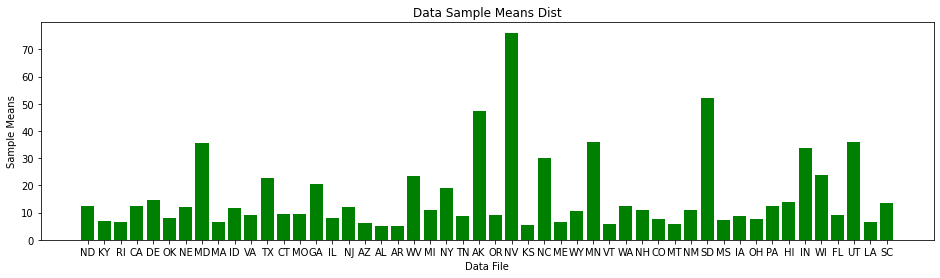

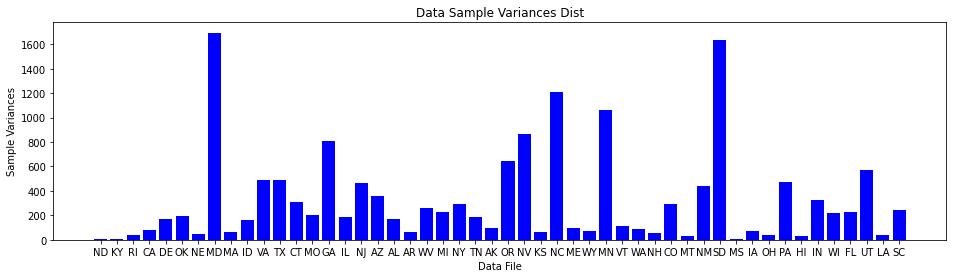

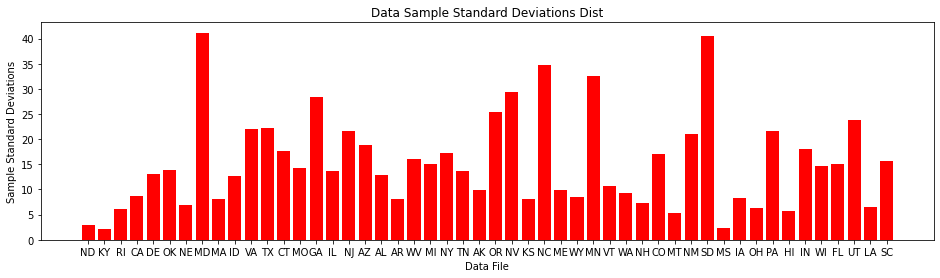

Mean of Means 15.930103301004547 - Std of Means - 13.946258320413394
Mean of Stds 15.308431088260235 - Std of Stds - 9.226917504443955


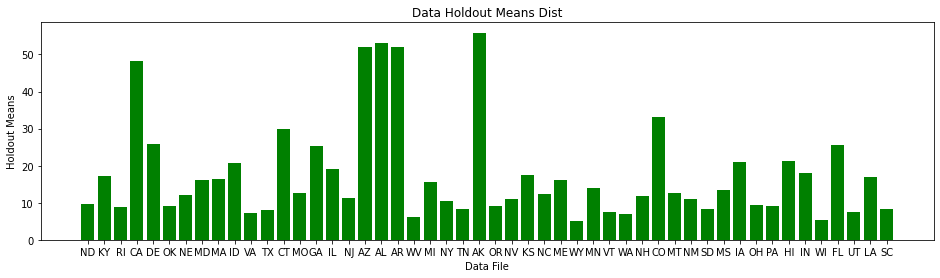

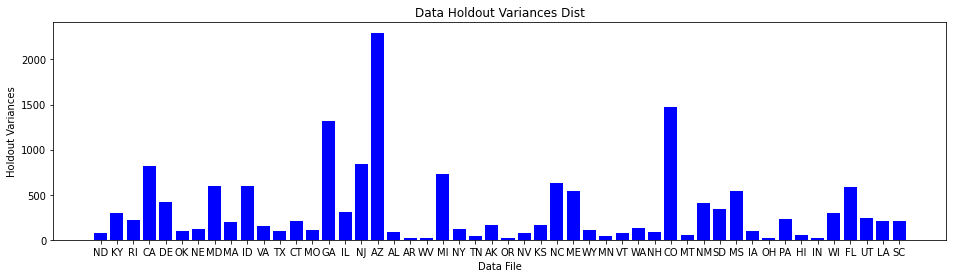

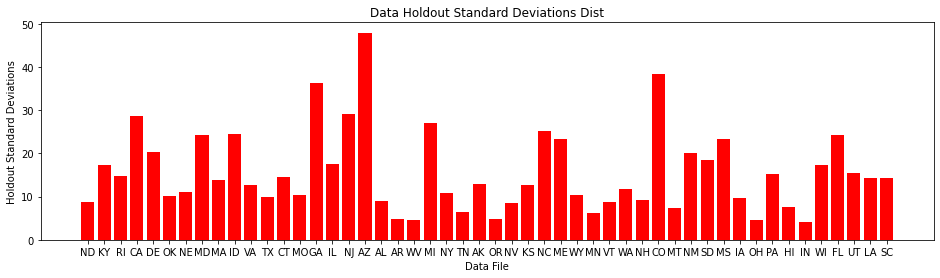

Mean of Means 17.677527937516047 - Std of Means - 13.147117763916889
Mean of Stds 15.657197190167292 - Std of Stds - 9.318549800818786


In [29]:
(states, means, variances, stds) = genNumbers("samples/")
graph(means, "Sample Means", states, 'green')
graph(variances, "Sample Variances", states, 'blue')
graph(stds, "Sample Standard Deviations", states, 'red')

print("Mean of Means {} - Std of Means - {}".format(np.mean(means), np.std(means)))
print("Mean of Stds {} - Std of Stds - {}".format(np.mean(stds), np.std(stds)))

(states, means, variances, stds) = genNumbers("holdout/")
graph(means, "Holdout Means", states, 'green')
graph(variances, "Holdout Variances", states, 'blue')
graph(stds, "Holdout Standard Deviations", states, 'red')

print("Mean of Means {} - Std of Means - {}".format(np.mean(means), np.std(means)))
print("Mean of Stds {} - Std of Stds - {}".format(np.mean(stds), np.std(stds)))

# Initial Findings
<ul>
    <li>States have the same distribution across sample and holdout</li>
    <li>States have different distributions</li>
    <li>Distribution affects LSTM performance (ND with lower variance has better accuracy than NV)</li>
</ul>

Mean of Means 17.677527937516047 - Std of Means - 13.147117763916889
Mean of Stds 15.657197190167292 - Std of Stds - 9.318549800818786
